In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

In [2]:
df_iris = pd.read_csv('iris.csv')

In [3]:
df_iris_1 = df_iris.drop(['variety'],axis=1)
df_iris_1

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
c = 3
q = 1.5
step = 0.5
maxq = 5
powerq= 1/(q-1)

In [5]:
rows_dataset =[]   
for index, rows in df_iris_1.iterrows(): 
    row_list =[rows['sepal.length'], rows['sepal.width'], rows['petal.length'] , 
                rows['petal.width']] 
    rows_dataset.append(np.array(row_list)) 
rows_dataset = np.array(rows_dataset)


In [6]:
 np.random.seed(0)
 cluster_list_indices = np.random.randint(low=0, high=149, size=3)
 cluster_list_indices.sort()

In [7]:
 cluster_list_mean_i = np.array([np.array(rows_dataset[i]) for i in cluster_list_indices])

In [8]:
r_nk = np.zeros((len(rows_dataset),c))

In [9]:
list_answers = []

# Cluster Data

In [10]:
list_of_q = []
count=1
while(q <5.5):
    max_iterations = 1000
    current = 0
    cluster_list_mean = cluster_list_mean_i
    r_nk = np.zeros((len(rows_dataset),c))
    while(current < max_iterations):
        for n in range(0,len(rows_dataset)):
            for k in range(0,c):
                t=0
                for m in range(0,c):
                    t += (
                    (np.linalg.norm(rows_dataset[n]-cluster_list_mean[k])**2)/
                    (np.linalg.norm(rows_dataset[n]-cluster_list_mean[m])**2)
                    )**powerq
                r_nk[n][k] = 1/t
        r_nk = np.nan_to_num(r_nk, nan=1)
        cluster_list_mean_new= []
        for k in range(0,c):
            numenator = 0
            denominator = 0
            for n in range(0,len(rows_dataset)):
                numenator   += (r_nk[n][k] ** q) * rows_dataset[n]
                denominator += (r_nk[n][k] ** q)
            cluster_list_mean_new.append(numenator/denominator)
        cluster_list_mean_new = np.array(cluster_list_mean_new)
        if np.allclose(cluster_list_mean, cluster_list_mean_new):
            break  
        cluster_list_mean = cluster_list_mean_new
        current += 1
    classifcation = [np.argmax(row, axis=0) for row in r_nk]
    list_of_q.append(classifcation)
    classifcation = np.array(classifcation).reshape((3, 50))
    confusion_matrix = np.array([[len(list(filter(lambda x: x==j, classifcation[i]))) for j in range(0,3)] for i in range(0,3)])
    print("Overall accuracy with q=",q ,": ",(np.sum(np.diag(confusion_matrix)))/df_iris_1.shape[0])
    list_answers.append(np.diag(confusion_matrix))
    count += 1
    q +=0.5
    powerq= 1/(q-1)
    

Overall accuracy with q= 1.5 :  0.8866666666666667
Overall accuracy with q= 2.0 :  0.8933333333333333
Overall accuracy with q= 2.5 :  0.9
Overall accuracy with q= 3.0 :  0.9
Overall accuracy with q= 3.5 :  0.9066666666666666
Overall accuracy with q= 4.0 :  0.9066666666666666
Overall accuracy with q= 4.5 :  0.9
Overall accuracy with q= 5.0 :  0.9


# Plot Figure

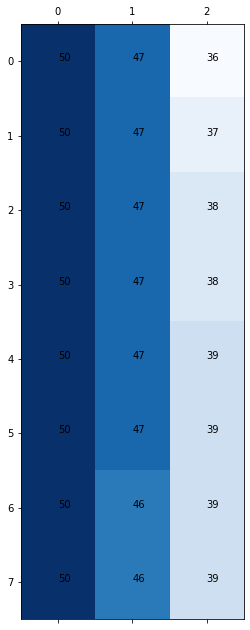

In [11]:
list_answers= np.array(list_answers)
plt.rc('figure', figsize=[8,3])
plt.matshow(list_answers,cmap='Blues')
for i in range(0,list_answers.shape[0]):
    for j in range(0,list_answers.shape[1]):
        plt.annotate(list_answers[i,j],(j,i))
plt.savefig("./Results/Count")